In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import utils 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
# constants

In [4]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [5]:
# lets create data frame

In [6]:
filenames = os.listdir("C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Train")
categories=[]
for i in filenames:
    category =i.split("_")[0]
    if category == "fire":
        categories.append(1)
    else:
        categories.append(0)
df= pd.DataFrame({"filename" : filenames, "category": categories})

In [7]:
df.shape

(1832, 2)

In [8]:
df.head()

,filename,category
0,fire_0001.jpg,1
1,fire_0002.jpg,1
2,fire_0003.jpg,1
3,fire_0004.jpg,1
4,fire_0005.jpg,1


In [9]:
df.shape

(1832, 2)

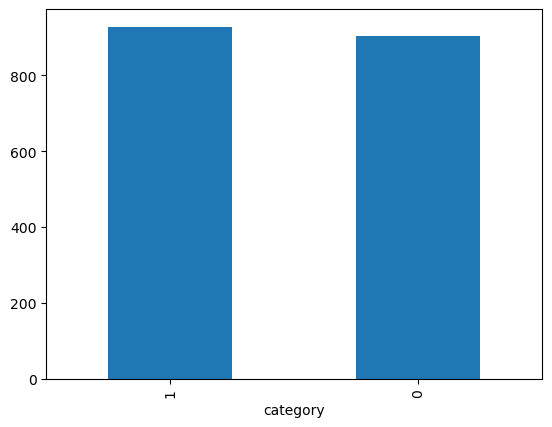

In [10]:
df["category"].value_counts().plot.bar()
plt.show()

In [11]:
### we can see that we are having nearly 900 fire images and 900 no fire imgages

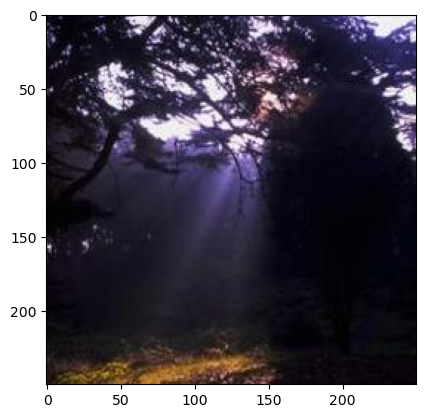

In [12]:
sam=random.choice(filenames)
image= load_img("C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Train/"+sam)
plt.imshow(image)
plt.show()

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

### Lets import model and lyers

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation= "relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))) # 128,128 is for image size and 3 is for rbg
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
            
model.add(Conv2D(128,(3,3), activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())    
model.add(Dense(512, activation= "relu")) 
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation= "softmax"))
          
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
          
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)      

In [15]:
### will do early stop to prevent from overfitting

In [16]:
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [17]:
# lets convert category column from integer to categorical to use image generator

In [18]:
df["category"] = df["category"].replace({0: 'no-fire', 1: 'fire'}) 

### lets import train_test_split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_data, validate_data = train_test_split(df, test_size= 0.2, random_state= 0)
train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)

In [21]:
train_data.head()

,filename,category
0,fire_113 (113).jpg,fire
1,nofire_0471.jpg,no-fire
2,fire_0172.jpg,fire
3,nofire_0661.jpg,no-fire
4,nofire_0533.jpg,no-fire


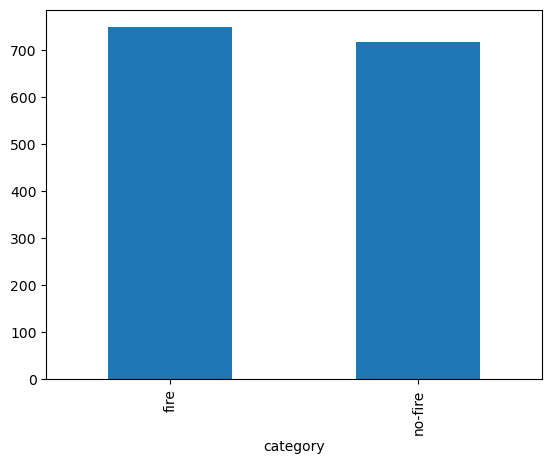

In [22]:
train_data["category"].value_counts().plot.bar()
plt.show()

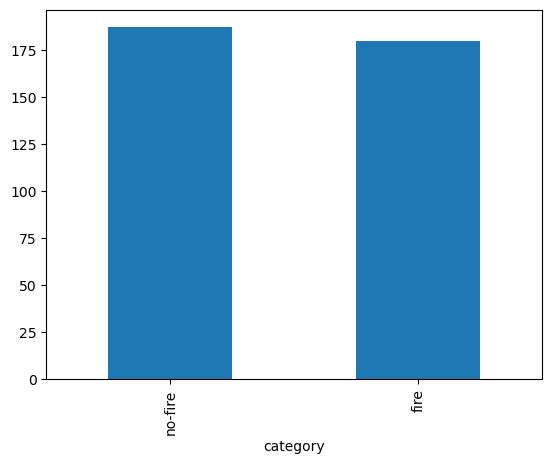

In [23]:
validate_data['category'].value_counts().plot.bar()
plt.show()

In [24]:
train_data.shape

(1465, 2)

In [25]:
validate_data.shape

(367, 2)

In [26]:
train_data.shape

(1465, 2)

In [27]:
total_train = train_data.shape[0]
total_validate = validate_data.shape[0]
batch_size=15

In [28]:
# Lets do generator for training

In [29]:
train_datagen =ImageDataGenerator( 
  rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator= train_datagen.flow_from_dataframe(
    train_data,
    "C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Train",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 1465 validated image filenames belonging to 2 classes.


In [30]:
# Lets do generator for validation

In [31]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_data, 
    "C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Train",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical',
    batch_size=15
)

Found 367 validated image filenames belonging to 2 classes.


# Lets See now that how our generator works

In [32]:
example_df = train_data.sample(n=1).reset_index(drop=True) # n=1 is used to tke 1 sample
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Train",
    x_col='filename',
    y_col='category',
    target_size=(128,128),
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


# lets print some generated images

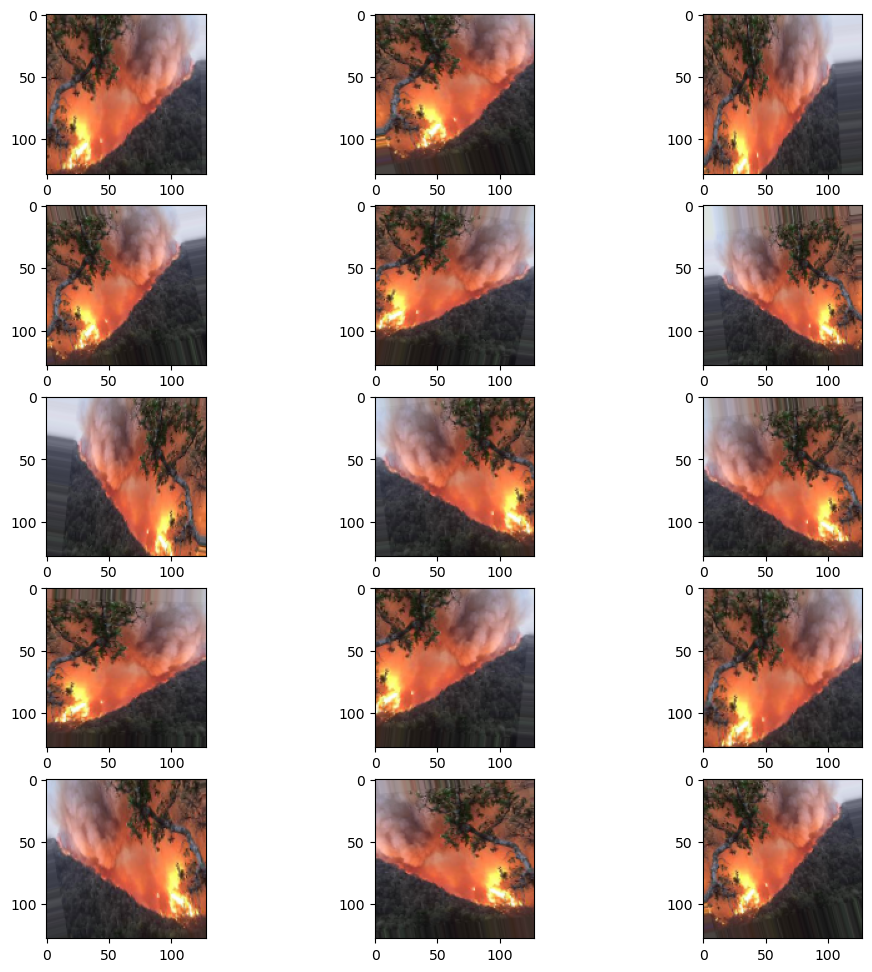

In [33]:
plt.figure(figsize=(12,12))
for i in range(1,16):
    plt.subplot(5,3,i)
    for X_batch, Y_batch in example_generator:
        image=X_batch[0]
        plt.imshow(image)
        break
plt.show()       

In [34]:
total_train = train_data.shape[0]
total_validate = validate_data.shape[0]

## Lets fit the model

In [35]:
FAST_RUN=False
epochs=3 if FAST_RUN else 50

history= model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//15,
    steps_per_epoch=total_train//15,
    callbacks=callbacks
)
model.save("model.h5")

Epoch 1/50


97/97 [==============================] - 65s 617ms/step - loss: 0.4455 - accuracy: 0.8828 - val_loss: 2.5270 - val_accuracy: 0.4944 - lr: 0.0010
Epoch 2/50
97/97 [==============================] - 55s 562ms/step - loss: 0.3149 - accuracy: 0.9041 - val_loss: 1.0897 - val_accuracy: 0.4917 - lr: 0.0010
Epoch 3/50
97/97 [==============================] - 60s 622ms/step - loss: 0.2626 - accuracy: 0.9048 - val_loss: 1.3425 - val_accuracy: 0.5361 - lr: 0.0010
Epoch 4/50
97/97 [==============================] - 57s 590ms/step - loss: 0.2366 - accuracy: 0.9214 - val_loss: 0.2485 - val_accuracy: 0.9139 - lr: 0.0010
Epoch 5/50
97/97 [==============================] - 55s 561ms/step - loss: 0.1897 - accuracy: 0.9379 - val_loss: 0.3264 - val_accuracy: 0.8306 - lr: 0.0010
Epoch 6/50
97/97 [==============================] - 54s 560ms/step - loss: 0.1633 - accuracy: 0.9393 - val_loss: 0.1104 - val_accuracy: 0.9556 - lr: 0.0010
Epoch 7/50
97/97 [==============================] - 55s 570ms/

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Lets visualize training

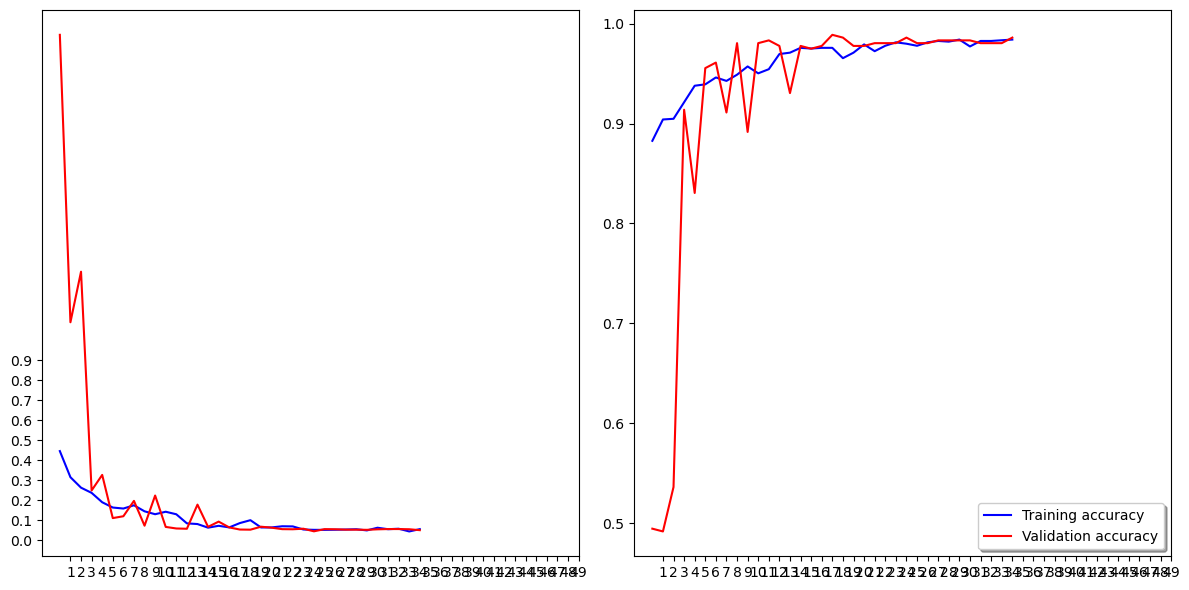

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Let our model predict 

In [39]:
for i in range(10):
    all_test_images = os.listdir("C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Test")
    random_image = random.choice(all_test_images)
    #print("image name is:- ",random_image)
    img = cv2.imread(f'C:/Users/admin/Documents/assingment questions/DS May - 05th Nov/Test/{random_image}')
    #print(img)
    img = cv2.resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH))
    
    org = img.copy()
    img = img.reshape(1,128,128,3)
    
    pred = model.predict(img)
    print(['no_fire','fire'][int(pred[0][0])])
    cv2.imshow('Live predictions',org)
    cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 47ms/step
fire
1/1 [==============================] - 0s 40ms/step
no_fire
1/1 [==============================] - 0s 47ms/step
no_fire
1/1 [==============================] - 0s 38ms/step
no_fire
1/1 [==============================] - 0s 38ms/step
no_fire
1/1 [==============================] - 0s 51ms/step
no_fire
1/1 [==============================] - 0s 39ms/step
no_fire
1/1 [==============================] - 0s 47ms/step
fire
1/1 [==============================] - 0s 47ms/step
no_fire
1/1 [==============================] - 0s 47ms/step
no_fire
